# Random Forest - Predicción de ImpactPlayerScore en CS:GO
Este notebook sigue la metodología CRISP-DM hasta la fase 4 para evaluar el modelo de regresión: **Random Forest**.

In [ ]:
# Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#Cargar datos y crear variables

url = "https://raw.githubusercontent.com/Seba-RiveraC/Crisp_DM_CSGO/refs/heads/master/Anexo%20ET_demo_round_traces_2022%20(1).csv"
df = pd.read_csv(url, sep=';')
# Crear variables necesarias
df['ImpactPlayerScore'] = df['RoundKills'] + 0.5 * df['RoundAssists'] + df['RoundHeadshots']
df['KAST'] = ((df['RoundKills'] > 0) | (df['RoundAssists'] > 0)).astype(int)
#para propositos de que no se rompa el collab, se usara una parte del dataset
df = df.sample(frac=0.45, random_state=42)

<ipython-input-2-2c022bf797be>:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


In [ ]:
# Fase 3 - Preparación de datos y limpieza
df_model = df.copy()
df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
df_model = df_model.replace({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})
for col in df_model.columns:
    if df_model[col].dtype == bool:
        df_model[col] = df_model[col].astype(int)
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

<ipython-input-3-6e3455b4a4bb>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
<ipython-input-3-6e3455b4a4bb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model = df_model.replace({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})



Modelo: Random Forest (con escalado)
MAE: 0.5597299573321355
MSE: 1.0036291685380643
RMSE: 1.0018129408916938
R²: 0.4694375464527215


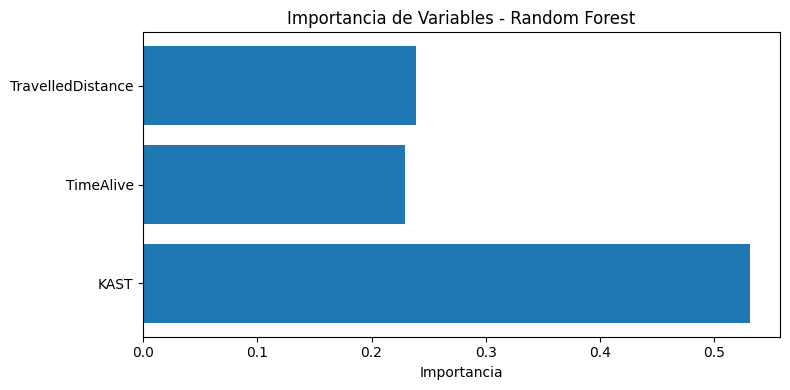

In [ ]:
# Random Forest con escalado
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Copiar datos
df_model = df.copy()


def convertir_a_float(valor):
    if isinstance(valor, str):
        valor = valor.replace('.', '').replace(',', '.')
        try:
            return float(valor)
        except:
            return np.nan
    return valor

# Aplicar limpieza a columnas clave
columnas = ['TimeAlive', 'TravelledDistance', 'KAST', 'ImpactPlayerScore']
for col in columnas:
    df_model[col] = df_model[col].apply(convertir_a_float)

# Eliminar nulos
df_model.dropna(subset=columnas, inplace=True)

# Variables predictoras y objetivo
X = df_model[['KAST', 'TimeAlive', 'TravelledDistance']]
y = df_model['ImpactPlayerScore']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42, n_estimators=100)
modelo_rf.fit(X_train_scaled, y_train)
y_pred_rf = modelo_rf.predict(X_test_scaled)

# Evaluación
print("\nModelo: Random Forest (con escalado)")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))

# Importancia de variables
importancia = modelo_rf.feature_importances_
variables = X.columns

plt.figure(figsize=(8, 4))
plt.barh(variables, importancia)
plt.xlabel("Importancia")
plt.title("Importancia de Variables - Random Forest")
plt.tight_layout()
plt.show()


## Analisis
Al reducir la muestra y mostrar los valores dependiendo de la importancia para la determinacion de los parametros del modelo se puede observar que el modelo hace su funcion de prediccion bastante bien, esto se ve reflejado por medio de que usando solo 3 variables se alcanzan valores de deduccion bastante altos y de error bastante bajos.
Sin embargo por como se vio en los demas analisis, svm consigue valores mas altos al escalarse, por lo que se elegiria svm en este caso para las siguientes fases